# Proyecto 9: Análisis de negocio de Showz

**Descripción del proyecto**
Te han ofrecido hacer prácticas en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing.

Los objetivos de este anális son: 
- Cómo los clientes usan el servicio
- Cuándo empiezan a comprar
- Cuánto dinero aporta cada cliente a la compañía;
- Cuándo los ingresos cubren el costo de adquisición de los clientes.


**Descripción de los datos**

La **tabla visits** (registros del servidor con datos sobre las visitas al sitio web):

- Uid: identificador único del usuario.
- Device: dispositivo del usuario.
- Start Ts: fecha y hora de inicio de la sesión.
- End Ts: fecha y hora de término de la sesión.
- Source Id: identificador de la fuente de anuncios de la que proviene el usuario.

Todas las fechas de esta tabla están en formato AAAA-MM-DD.

La **tabla orders** (datos sobre pedidos):

- Uid: identificador único del usuario que realiza un pedido.
- Buy Ts: fecha y hora del pedido. 
- Revenue: el ingreso de Showz por el pedido.


La **tabla costs** (datos sobre gastos de marketing):

- source_id: identificador de la fuente de anuncios.
- dt: fecha.
- costs: gastos en esta fuente de anuncios en este día.

# 1.Importar librerías y datasets

In [1]:
#importar librerías
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df_costs = pd.read_csv("/datasets/costs_us.csv")
df_orders = pd.read_csv("/datasets/orders_log_us.csv")
df_visits = pd.read_csv("/datasets/visits_log_us.csv")

# 2. Revisión y limpieza de datos

In [3]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [4]:
df_costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [5]:
df_costs["dt"] = pd.to_datetime(df_costs["dt"])

In [6]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [7]:
df_costs.duplicated().sum()

0

In [8]:
df_costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
df_orders

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [11]:
df_orders.columns = df_orders.columns.str.lower()
df_orders = df_orders.rename(columns={"buy ts":"buy_ts"})


In [12]:
df_orders["buy_ts"] = pd.to_datetime(df_orders["buy_ts"])

In [13]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [14]:
df_orders.duplicated().sum()

0

In [15]:
df_orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [16]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [17]:
df_visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [18]:
df_visits.columns = df_visits.columns.str.lower()
df_visits = df_visits.rename(columns= {"end ts":"end_ts", "start ts":"start_ts","source id":"source_id"})

In [19]:
df_visits

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [20]:
df_visits["end_ts"] = pd.to_datetime(df_visits["end_ts"])

In [21]:
df_visits["start_ts"] = pd.to_datetime(df_visits["start_ts"])

In [22]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [23]:
df_visits.duplicated().sum()

0

In [24]:
df_visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

# Paso 2. Informes y cálculo de métricas

**Visitas:**
- **¿Cuántas personas lo usan cada día, semana y mes?**

In [25]:
#Enriquecemos la tabla con la extracción del día, mes y semana de las columnas start_ts y end_ts
df_visits["start_day"] = df_visits["start_ts"].dt.day
df_visits["start_week"] = df_visits["start_ts"].dt.isocalendar().week
df_visits["start_month"] = df_visits["start_ts"].dt.to_period('M').dt.start_time
df_visits["start_day_name"] = df_visits["start_ts"].dt.day_name()

df_visits["end_day"] = df_visits["end_ts"].dt.day
df_visits["end_week"] = df_visits["end_ts"].dt.isocalendar().week
df_visits["end_month"] = df_visits["end_ts"].dt.to_period('M').dt.start_time
df_visits["end_day_name"] = df_visits["end_ts"].dt.day_name()

In [26]:
df_visits

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,start_day_name,end_day,end_week,end_month,end_day_name
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,2017-12-01,Wednesday,20,51,2017-12-01,Wednesday
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2018-02-01,Monday,19,8,2018-02-01,Monday
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,2017-07-01,Saturday,1,26,2017-07-01,Saturday
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,2018-05-01,Sunday,20,20,2018-05-01,Sunday
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,2017-12-01,Wednesday,27,52,2017-12-01,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,29,30,2017-07-01,Saturday,29,30,2017-07-01,Saturday
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,25,4,2018-01-01,Thursday,25,4,2018-01-01,Thursday
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,9,2018-03-01,Saturday,3,9,2018-03-01,Saturday
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2,44,2017-11-01,Thursday,2,44,2017-11-01,Thursday


<AxesSubplot:title={'center':'Visitas por día'}, ylabel='Número de visitas'>

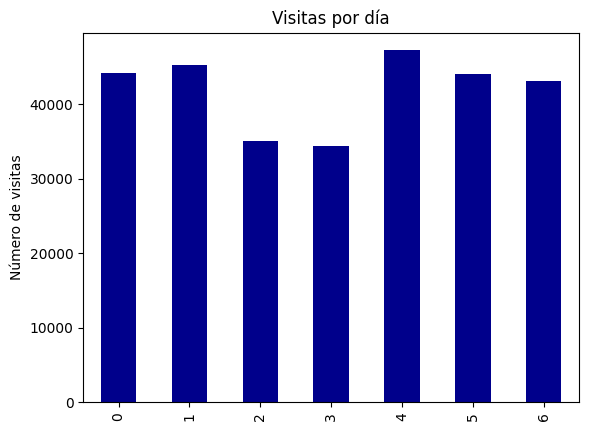

In [27]:
visits_per_day = df_visits.groupby("start_day_name")["uid"].nunique().reset_index(name="visits_per_day")
visits_per_day.plot(kind="bar", color="darkblue",legend="", 
                    title="Visitas por día", ylabel="Número de visitas", 
                    )

Los Lunes, Martes y Viernes son los díass en los que más visitas se registran al sitio, con más de 40,000 visitas. Sin embargo, casi todos los días tienen ingresos constantes sin picos o valles significativos. 

<AxesSubplot:title={'center':'Visitas por mes'}, ylabel='Número de visitas'>

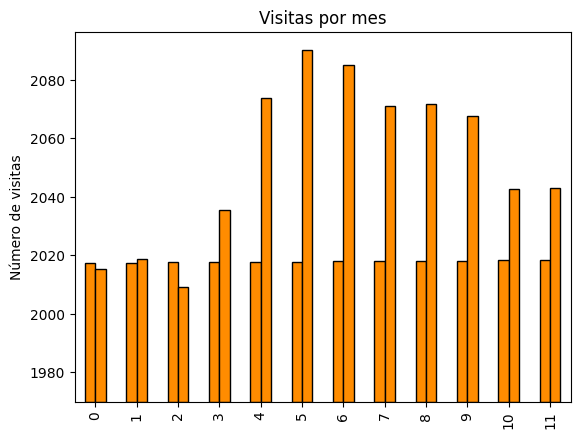

In [28]:
visits_per_month = df_visits.groupby("start_month")["uid"].count().reset_index(name="visits_per_month")
visits_per_month.plot(kind="bar", color="darkorange", legend="", edgecolor="black", 
                      title="Visitas por mes", ylabel="Número de visitas")

In [88]:
avg_visits_per_month = df_visits.groupby("start_month")["uid"].count()
print(f"El promedio de visitas al mes es de: {avg_visits_per_month.mean()} sesiones")

El promedio de visitas al mes es de: 29950.0 sesiones


Los meses con mayor ingreso de mayo a julio de 2018, alcanzando hasta más un poco más de 2000 visitas. 

<AxesSubplot:title={'center':'Visitas por semana'}, ylabel='Número de visitas'>

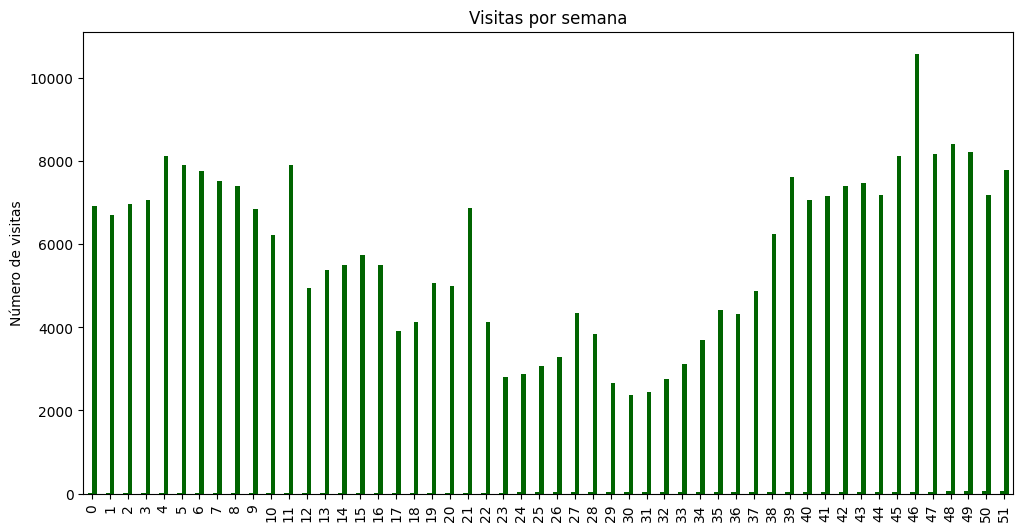

In [29]:
visits_per_week = df_visits.groupby("start_week")["uid"].nunique().reset_index(name="visits_per_week")
visits_per_week.plot(kind="bar", figsize=(12, 6), legend="", color="darkgreen", title="Visitas por semana", ylabel="Número de visitas")

In [90]:
avg_visits_per_week = df_visits.groupby("start_week")["uid"].count()
print(f"El promedio de visitas a la semana es de: {avg_visits_per_week.mean()} sesiones")

El promedio de visitas a la semana es de: 6911.538461538462 sesiones


- **¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)**

<AxesSubplot:title={'center':'Total de sesiones al día'}, ylabel='Número de sesiones'>

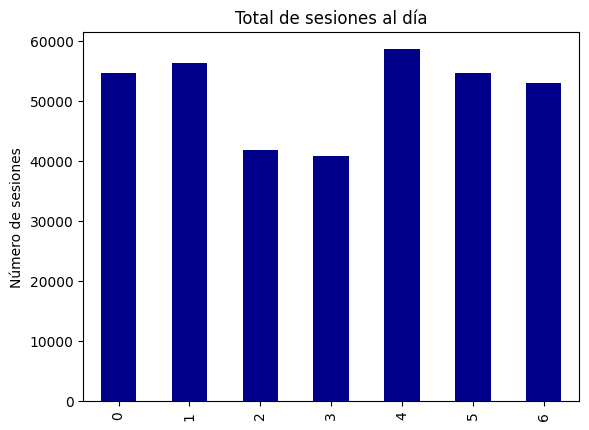

In [30]:
#¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
total_visits_per_day = df_visits.groupby("start_day_name")["uid"].size().reset_index(name="total_visits")
total_visits_per_day.plot(kind="bar", legend="", title="Total de sesiones al día", ylabel="Número de sesiones", color="darkblue")

In [89]:
avg_visits_per_day = df_visits.groupby("start_day")["uid"].count()
print(f"El promedio de visitas al día es de: {avg_visits_per_day.mean()} sesiones")

El promedio de visitas al día es de: 11593.548387096775 sesiones


Con esta gráfica se toma en cuenta el total de sesiones en donde los lunes, martes y viernes acumulan el mayor número de sesiones con hasta casi 60,000 sesiones. Los miércoles y jueves presentan casi 40,000 sesiones. Por lo que se puede concluir que el sitio tiene visitas constantes. 

- **¿Cuál es la duración de cada sesión?**

In [31]:
df_visits["session_time"] =  df_visits["end_ts"] - df_visits["start_ts"]
avg_session = df_visits["session_time"].mean()
print(f"La duración promedio de la sesiones es de {avg_session}")

La duración promedio de la sesiones es de 0 days 00:10:43.025687256


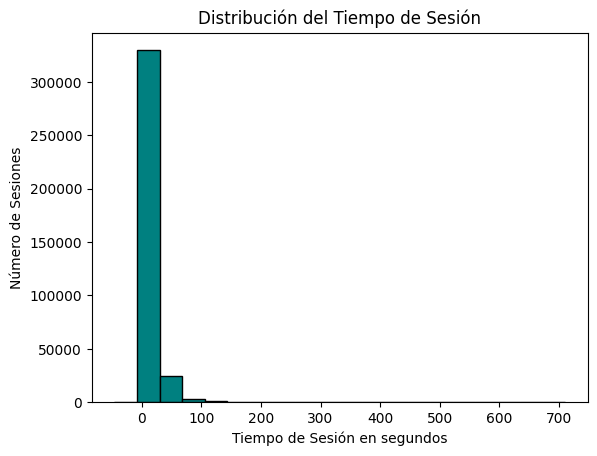

In [32]:
df_visits["session_time_seconds"] = df_visits["session_time"].dt.total_seconds()/60
plt.hist(df_visits["session_time_seconds"].dropna(), bins=20, edgecolor="black", color="teal")

plt.title("Distribución del Tiempo de Sesión")
plt.xlabel("Tiempo de Sesión en segundos")
plt.ylabel("Número de Sesiones")


plt.show()

Las sesiones tienen muy poca duración, con hasta 60 segundos en donde el usuario revisa el sitio. Sin embargo, hay una gran concentración de usuarios que solo abren y cierran el sitio ya que hay un número de sesiones de más de 300,000 con solo 0 segundos de duración. 

- **¿Con qué frecuencia los usuarios regresan?**

In [33]:
first_session = df_visits.groupby("uid").agg({"start_ts":"min"}).reset_index()
first_session.columns = ["uid","first_session_start_ts"]

In [34]:
first_session["first_session_date"] = first_session["first_session_start_ts"].dt.date
first_session["first_session_month"] = first_session["first_session_start_ts"].dt.to_period('M').dt.start_time
first_session

,uid,first_session_start_ts,first_session_date,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01


In [35]:
df_complete_visits = pd.merge(first_session, df_visits, on="uid")
df_complete_visits

,uid,first_session_start_ts,first_session_date,first_session_month,device,end_ts,source_id,start_ts,start_day,start_week,start_month,start_day_name,end_day,end_week,end_month,end_day_name,session_time,session_time_seconds
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,1,9,2018-03-01,Thursday,1,9,2018-03-01,Thursday,0 days 00:06:00,6.0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,6,6,2018-02-01,Tuesday,6,6,2018-02-01,Tuesday,0 days 00:02:00,2.0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,7,23,2017-06-01,Wednesday,7,23,2017-06-01,Wednesday,0 days 00:01:00,1.0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,11,10,2018-03-01,Sunday,11,10,2018-03-01,Sunday,0 days 00:06:00,6.0
4,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,18,38,2017-09-01,Monday,18,38,2017-09-01,Monday,0 days 00:18:00,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,18446424184725333426,2017-12-06 20:32:00,2017-12-06,2017-12-01,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00,6,49,2017-12-01,Wednesday,6,49,2017-12-01,Wednesday,0 days 00:00:00,0.0
359396,18446556406699109058,2018-01-01 16:29:00,2018-01-01,2018-01-01,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00,1,1,2018-01-01,Monday,1,1,2018-01-01,Monday,0 days 00:02:00,2.0
359397,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00,21,21,2018-05-01,Monday,21,21,2018-05-01,Monday,0 days 00:15:00,15.0
359398,18446621818809592527,2017-12-27 13:27:00,2017-12-27,2017-12-01,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00,27,52,2017-12-01,Wednesday,27,52,2017-12-01,Wednesday,0 days 00:41:00,41.0


In [36]:
df_complete_visits["age"] = (df_complete_visits["start_month"].dt.month - df_complete_visits["first_session_month"].dt.month)
df_complete_visits['age'] += 12*(df_complete_visits['start_month'].dt.year - df_complete_visits['first_session_month'].dt.year)

<AxesSubplot:title={'center':'Frecuencia de regreso de los usuarios'}, xlabel='age', ylabel='first_session_month'>

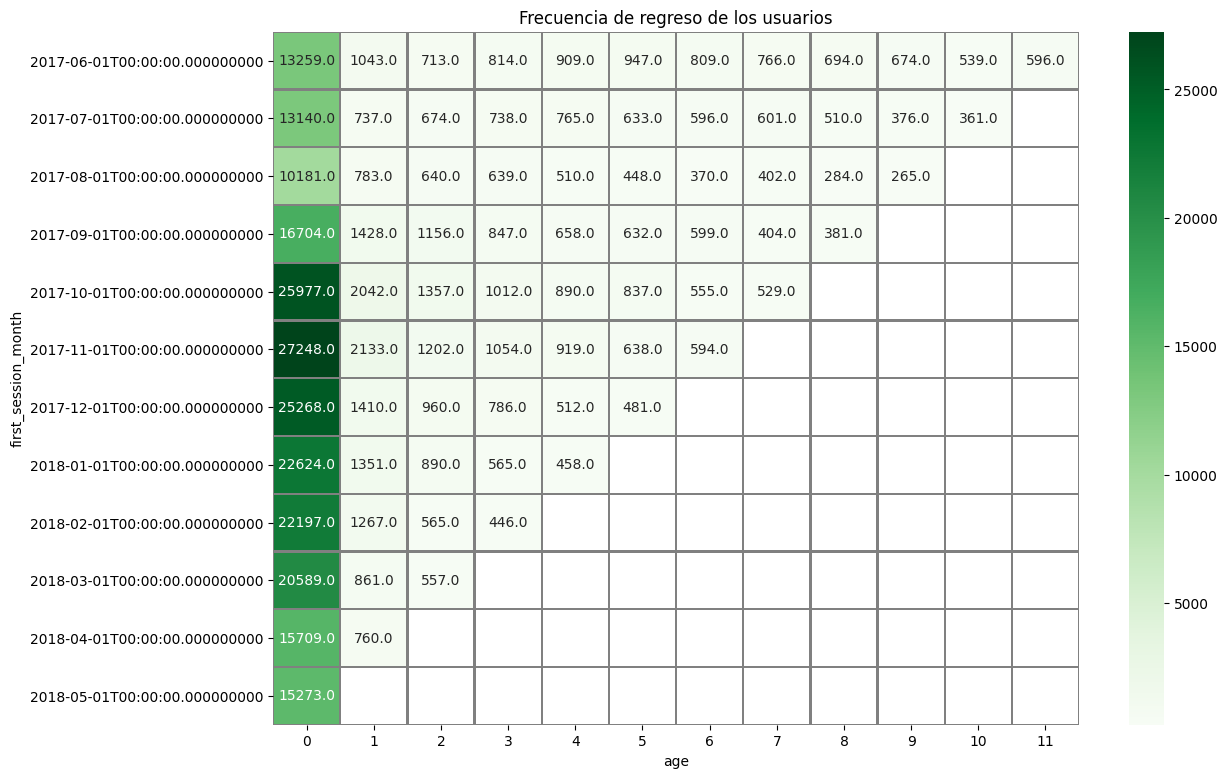

In [37]:
df_complete_visits_pivot = df_complete_visits.pivot_table(index="first_session_month", 
                               columns="age", 
                               values="uid", 
                               aggfunc="nunique")
df_complete_visits_pivot.fillna("")
plt.figure(figsize=(13, 9))
plt.title("Frecuencia de regreso de los usuarios")
sns.heatmap(
    df_complete_visits_pivot,
    annot=True,
    cmap="Greens",
    fmt=".1f",
    linewidths=1,
    linecolor="gray",)


De acuerdo con los usuarios que realizaron sus compras, la frecuencia de que los usuarios regresen al sitio es en su mayoría baja. Con número entre el 4 a 6 visitas de regreso. Sin embargo, para el cohorte que realizó su primera compra en Septiembre 2017, realizó varias visitas en Diciembre con 62.6. Se podría afirmar que ese cohorte fue el que más regresó al sitio. 

# Ventas

- ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. 
- Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.
- Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.) 

- ¿Cuántos pedidos hacen durante un período de tiempo dado? 
- ¿Cuál es el tamaño promedio de compra? 
- ¿Cuánto dinero traen? (LTV)

In [38]:
#¿Cuándo empieza la gente a comprar?
#agrupar por la primera compra que realizó el usuario
first_order_date_by_uid = df_orders.groupby("uid")["buy_ts"].min()
first_order_date_by_uid.name = "first_order_date"

df_orders = df_orders.join(first_order_date_by_uid, on="uid")
df_orders

,buy_ts,revenue,uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00


In [39]:
#obtener el día de la primera compra
df_orders["first_order_day"] = df_orders["first_order_date"].astype("datetime64[D]")
df_orders["order_day"] = df_orders["buy_ts"].astype("datetime64[D]")

In [40]:
#agrupar por el primer día de registro de cada usuario
first_register_by_uid = df_visits.groupby("uid")["start_ts"].min()
first_register_by_uid.name = "first_register_date"

#unir el primer registro a df_visits
df_visits = df_visits.join(first_register_by_uid, on="uid")
df_visits

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,start_day_name,end_day,end_week,end_month,end_day_name,session_time,session_time_seconds,first_register_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,20,51,2017-12-01,Wednesday,20,51,2017-12-01,Wednesday,0 days 00:18:00,18.000000,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,19,8,2018-02-01,Monday,19,8,2018-02-01,Monday,0 days 00:28:00,28.000000,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,1,26,2017-07-01,Saturday,1,26,2017-07-01,Saturday,0 days 00:00:00,0.000000,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,20,20,2018-05-01,Sunday,20,20,2018-05-01,Sunday,0 days 00:24:00,24.000000,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,27,52,2017-12-01,Wednesday,27,52,2017-12-01,Wednesday,0 days 00:00:00,0.000000,2017-12-27 14:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,29,30,2017-07-01,Saturday,29,30,2017-07-01,Saturday,0 days 00:00:19,0.316667,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,25,4,2018-01-01,Thursday,25,4,2018-01-01,Thursday,0 days 00:00:19,0.316667,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,3,9,2018-03-01,Saturday,3,9,2018-03-01,Saturday,0 days 00:00:19,0.316667,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2,44,2017-11-01,Thursday,2,44,2017-11-01,Thursday,0 days 00:00:19,0.316667,2017-11-02 10:12:00


In [41]:
#obtener el día del primer registro
df_visits["first_register_day"] = df_visits["first_register_date"].astype("datetime64[D]")
df_visits["register_day"] = df_visits["start_ts"].astype("datetime64[D]")

In [42]:
df_visits.sample(10)

,device,end_ts,source_id,start_ts,uid,start_day,start_week,start_month,start_day_name,end_day,end_week,end_month,end_day_name,session_time,session_time_seconds,first_register_date,first_register_day,register_day
353997,desktop,2017-10-15 20:16:00,4,2017-10-15 20:03:00,17913350314967014073,15,41,2017-10-01,Sunday,15,41,2017-10-01,Sunday,0 days 00:13:00,13.0,2017-10-15 20:03:00,2017-10-15,2017-10-15
358079,desktop,2017-11-24 19:34:00,3,2017-11-24 18:25:00,11288542518775601891,24,47,2017-11-01,Friday,24,47,2017-11-01,Friday,0 days 01:09:00,69.0,2017-11-24 18:25:00,2017-11-24,2017-11-24
99125,desktop,2017-09-13 18:50:00,3,2017-09-13 18:48:00,16213758228922943331,13,37,2017-09-01,Wednesday,13,37,2017-09-01,Wednesday,0 days 00:02:00,2.0,2017-09-13 18:48:00,2017-09-13,2017-09-13
197344,desktop,2017-11-23 12:57:00,1,2017-11-23 12:51:00,13595097927165414464,23,47,2017-11-01,Thursday,23,47,2017-11-01,Thursday,0 days 00:06:00,6.0,2017-11-23 12:51:00,2017-11-23,2017-11-23
14878,touch,2017-10-13 22:06:00,4,2017-10-13 22:01:00,10388824018593280155,13,41,2017-10-01,Friday,13,41,2017-10-01,Friday,0 days 00:05:00,5.0,2017-10-13 22:01:00,2017-10-13,2017-10-13
133319,desktop,2017-11-16 07:57:00,3,2017-11-16 07:44:00,7396826844663845065,16,46,2017-11-01,Thursday,16,46,2017-11-01,Thursday,0 days 00:13:00,13.0,2017-11-16 06:15:00,2017-11-16,2017-11-16
203353,desktop,2018-03-02 17:29:00,1,2018-03-02 17:00:00,12516292497819704102,2,9,2018-03-01,Friday,2,9,2018-03-01,Friday,0 days 00:29:00,29.0,2018-03-01 21:04:00,2018-03-01,2018-03-02
200209,desktop,2018-04-04 20:22:00,10,2018-04-04 19:15:00,7330633518955197121,4,14,2018-04-01,Wednesday,4,14,2018-04-01,Wednesday,0 days 01:07:00,67.0,2017-11-13 15:03:00,2017-11-13,2018-04-04
86099,touch,2017-12-08 17:57:00,3,2017-12-08 17:56:00,13938127756047722366,8,49,2017-12-01,Friday,8,49,2017-12-01,Friday,0 days 00:01:00,1.0,2017-12-08 17:56:00,2017-12-08,2017-12-08
266635,desktop,2018-02-26 11:39:00,4,2018-02-26 11:30:00,17173770487938231908,26,9,2018-02-01,Monday,26,9,2018-02-01,Monday,0 days 00:09:00,9.0,2017-12-21 12:32:00,2017-12-21,2018-02-26


In [43]:
df_sales_analysis = df_orders.merge(df_visits, on="uid")
df_sales_analysis

,buy_ts,revenue,uid,first_order_date,first_order_day,order_day,device,end_ts,source_id,start_ts,...,start_day_name,end_day,end_week,end_month,end_day_name,session_time,session_time_seconds,first_register_date,first_register_day,register_day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,...,Thursday,1,22,2017-06-01,Thursday,0 days 00:02:00,2.0,2017-06-01 00:09:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,...,Thursday,1,22,2017-06-01,Thursday,0 days 00:11:00,11.0,2017-06-01 00:14:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,...,Thursday,1,22,2017-06-01,Thursday,0 days 00:09:00,9.0,2017-06-01 00:25:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,...,Thursday,1,22,2017-06-01,Thursday,0 days 00:19:00,19.0,2017-06-01 00:14:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,...,Thursday,1,22,2017-06-01,Thursday,0 days 00:28:00,28.0,2017-06-01 07:31:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2018-01-15 10:47:00,4,2018-01-15 10:39:00,...,Monday,15,3,2018-01-01,Monday,0 days 00:08:00,8.0,2017-10-23 12:32:00,2017-10-23,2018-01-15
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-12-12 16:21:00,5,2017-12-12 16:20:00,...,Tuesday,12,50,2017-12-01,Tuesday,0 days 00:01:00,1.0,2017-10-23 12:32:00,2017-10-23,2017-12-12
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-10-23 12:36:00,3,2017-10-23 12:32:00,...,Monday,23,43,2017-10-01,Monday,0 days 00:04:00,4.0,2017-10-23 12:32:00,2017-10-23,2017-10-23
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-11-15 17:18:00,4,2017-11-15 17:08:00,...,Wednesday,15,46,2017-11-01,Wednesday,0 days 00:10:00,10.0,2017-10-23 12:32:00,2017-10-23,2017-11-15


In [44]:
df_sales_analysis["conversion"] = df_sales_analysis["first_order_day"] - df_sales_analysis["first_register_day"]
df_sales_analysis

,buy_ts,revenue,uid,first_order_date,first_order_day,order_day,device,end_ts,source_id,start_ts,...,end_day,end_week,end_month,end_day_name,session_time,session_time_seconds,first_register_date,first_register_day,register_day,conversion
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,...,1,22,2017-06-01,Thursday,0 days 00:02:00,2.0,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,...,1,22,2017-06-01,Thursday,0 days 00:11:00,11.0,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,...,1,22,2017-06-01,Thursday,0 days 00:09:00,9.0,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,...,1,22,2017-06-01,Thursday,0 days 00:19:00,19.0,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,...,1,22,2017-06-01,Thursday,0 days 00:28:00,28.0,2017-06-01 07:31:00,2017-06-01,2017-06-01,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2018-01-15 10:47:00,4,2018-01-15 10:39:00,...,15,3,2018-01-01,Monday,0 days 00:08:00,8.0,2017-10-23 12:32:00,2017-10-23,2018-01-15,220 days
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-12-12 16:21:00,5,2017-12-12 16:20:00,...,12,50,2017-12-01,Tuesday,0 days 00:01:00,1.0,2017-10-23 12:32:00,2017-10-23,2017-12-12,220 days
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-10-23 12:36:00,3,2017-10-23 12:32:00,...,23,43,2017-10-01,Monday,0 days 00:04:00,4.0,2017-10-23 12:32:00,2017-10-23,2017-10-23,220 days
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-11-15 17:18:00,4,2017-11-15 17:08:00,...,15,46,2017-11-01,Wednesday,0 days 00:10:00,10.0,2017-10-23 12:32:00,2017-10-23,2017-11-15,220 days


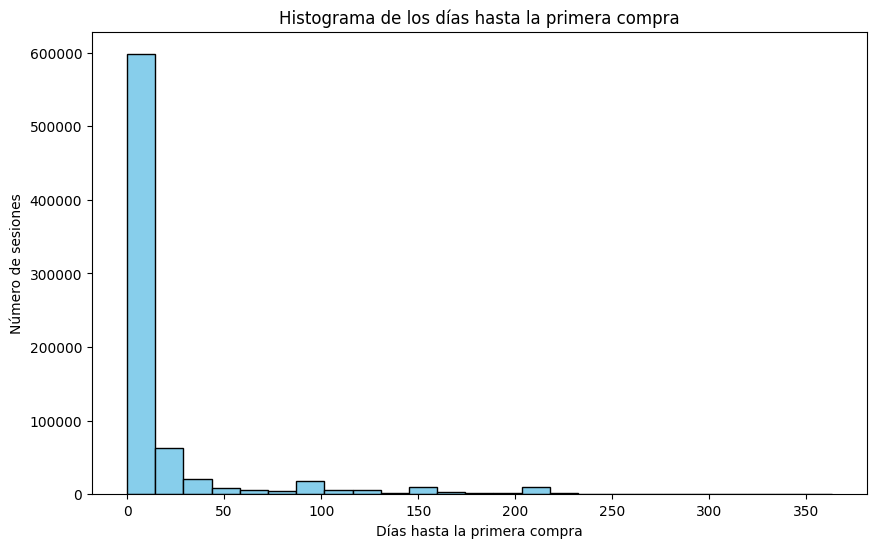

In [45]:
df_sales_analysis["conversion_days"] = df_sales_analysis["conversion"].dt.days

plt.figure(figsize=(10, 6))
plt.hist(df_sales_analysis["conversion_days"], bins=25, color="skyblue", edgecolor="black")

plt.xlabel("Días hasta la primera compra")
plt.ylabel("Número de sesiones")
plt.title("Histograma de los días hasta la primera compra")
plt.show()

La primera compra de los usuarios se realiza de manera casi inmediata después de haberse registrado. Ya que gran parte de las compras se concentra entre el 1 a 5 días. Por lo que los usuarios se convencen rápidamente de realizar su primera compra, con más de 600,000 usuarios convencidos. 

In [46]:
df_sales_analysis["start_month"] = df_sales_analysis["buy_ts"].dt.to_period('M').dt.start_time
df_sales_analysis["first_buy_month"] = df_sales_analysis["buy_ts"].min()
df_sales_analysis

,buy_ts,revenue,uid,first_order_date,first_order_day,order_day,device,end_ts,source_id,start_ts,...,end_month,end_day_name,session_time,session_time_seconds,first_register_date,first_register_day,register_day,conversion,conversion_days,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,...,2017-06-01,Thursday,0 days 00:02:00,2.0,2017-06-01 00:09:00,2017-06-01,2017-06-01,0 days,0,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,...,2017-06-01,Thursday,0 days 00:11:00,11.0,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days,0,2017-06-01 00:10:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,...,2017-06-01,Thursday,0 days 00:09:00,9.0,2017-06-01 00:25:00,2017-06-01,2017-06-01,0 days,0,2017-06-01 00:10:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,...,2017-06-01,Thursday,0 days 00:19:00,19.0,2017-06-01 00:14:00,2017-06-01,2017-06-01,0 days,0,2017-06-01 00:10:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,...,2017-06-01,Thursday,0 days 00:28:00,28.0,2017-06-01 07:31:00,2017-06-01,2017-06-01,0 days,0,2017-06-01 00:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2018-01-15 10:47:00,4,2018-01-15 10:39:00,...,2018-01-01,Monday,0 days 00:08:00,8.0,2017-10-23 12:32:00,2017-10-23,2018-01-15,220 days,220,2017-06-01 00:10:00
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-12-12 16:21:00,5,2017-12-12 16:20:00,...,2017-12-01,Tuesday,0 days 00:01:00,1.0,2017-10-23 12:32:00,2017-10-23,2017-12-12,220 days,220,2017-06-01 00:10:00
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-10-23 12:36:00,3,2017-10-23 12:32:00,...,2017-10-01,Monday,0 days 00:04:00,4.0,2017-10-23 12:32:00,2017-10-23,2017-10-23,220 days,220,2017-06-01 00:10:00
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,desktop,2017-11-15 17:18:00,4,2017-11-15 17:08:00,...,2017-11-01,Wednesday,0 days 00:10:00,10.0,2017-10-23 12:32:00,2017-10-23,2017-11-15,220 days,220,2017-06-01 00:10:00


- **Comparación de las conversiones de diferentes cohortes para determinar qué cohorte o canal de marketing es más efectivo**

<AxesSubplot:xlabel='start_month'>

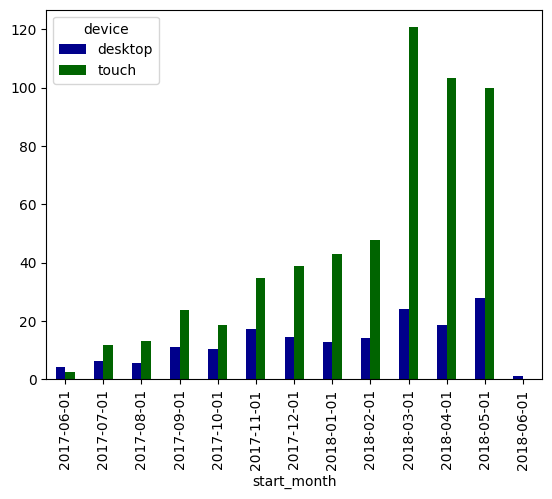

In [47]:
df_sales_analysis["start_month"] = df_sales_analysis["start_month"].dt.strftime("%Y-%m-%d")
pivot_per_device = df_sales_analysis.pivot_table(index="start_month", columns="device", values="conversion_days",aggfunc="mean")
pivot_per_device.plot(kind="bar", color=["darkblue","darkgreen"])

In [48]:
days_per_device = df_sales_analysis.groupby("device")["conversion_days"].mean().reset_index()
days_per_device

,device,conversion_days
0,desktop,15.064295
1,touch,55.224889


Con esta gráfica y revisión de la conversión del usuario, las primeras compras se realizan de manera más frecuente cuando se visita el sitio en una computadora, comparado a un teléfono. En especial se ve esta diferencia a principios del 20218, los días para la conversión en el touch aumentan de 40 a 120 días. 

- **¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [49]:
df_orders["first_order_month"] = df_orders["first_order_date"].astype("datetime64[M]").dt.strftime("%Y-%m-%d")
df_orders["order_month"] = df_orders["buy_ts"].astype("datetime64[M]").dt.strftime("%Y-%m-%d")

<AxesSubplot:title={'center':'Número de pedidos por cohorte'}, xlabel='order_month', ylabel='first_order_month'>

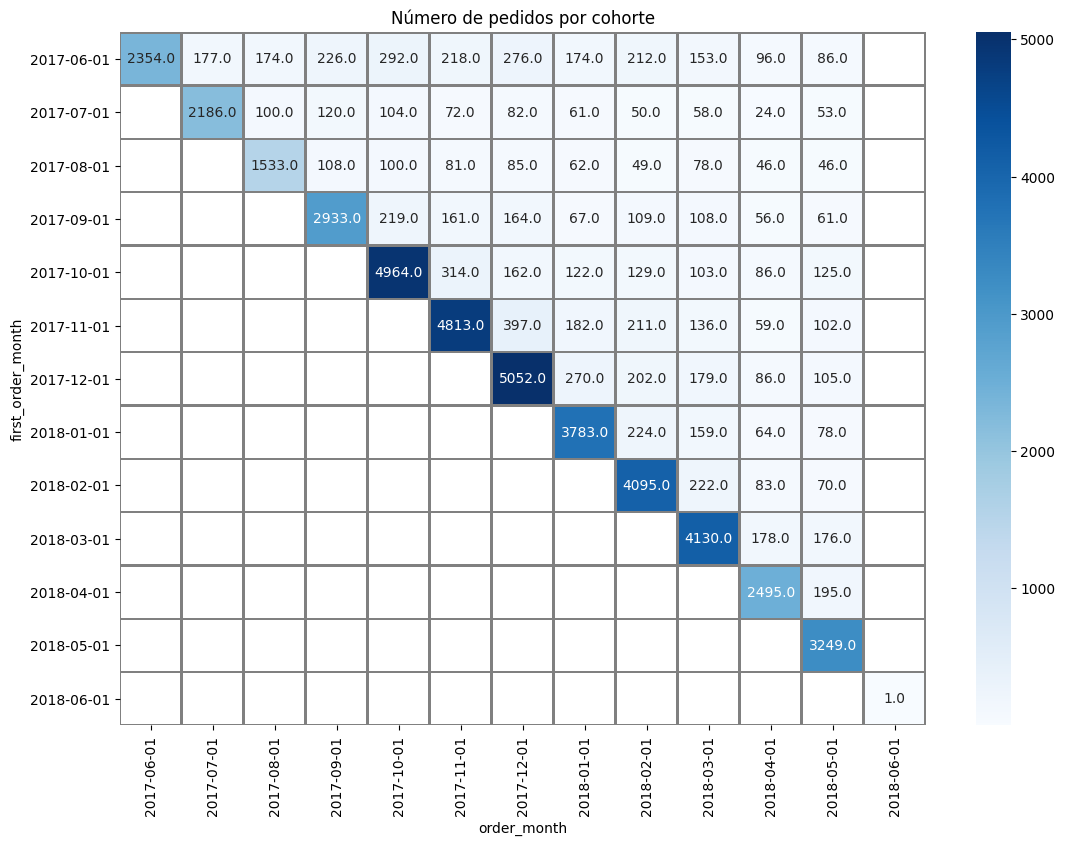

In [52]:
pivot_orders = df_orders.pivot_table(index="first_order_month", columns="order_month", values="buy_ts", aggfunc="count")
plt.figure(figsize=(13, 9))
plt.title("Número de pedidos por cohorte")
sns.heatmap(
    pivot_orders,
    annot=True,
    cmap="Blues",
    fmt=".1f",
    linewidths=1,
    linecolor="gray",)

En todos los cohortes lass compras se concentran al iniciar su registro en el sitio web. El cohorte más fuerte fue el de octubre a diciembre de 2017. Hay registros de 5,052 a 1,533. Sin embargo, cuando se realiza la segunda compra, baja considerablemente el número de pedidos, con su número más alto de 397 compras. Por lo que al pasar los meses, los usuarios pierden interés en seguir comprando. Esto aplica para todos los cohortes. 

- **¿Cuál es el tamaño promedio de compra?**

<AxesSubplot:title={'center':'Tamaño promedio de la compra por cohorte'}, xlabel='order_month', ylabel='first_order_month'>

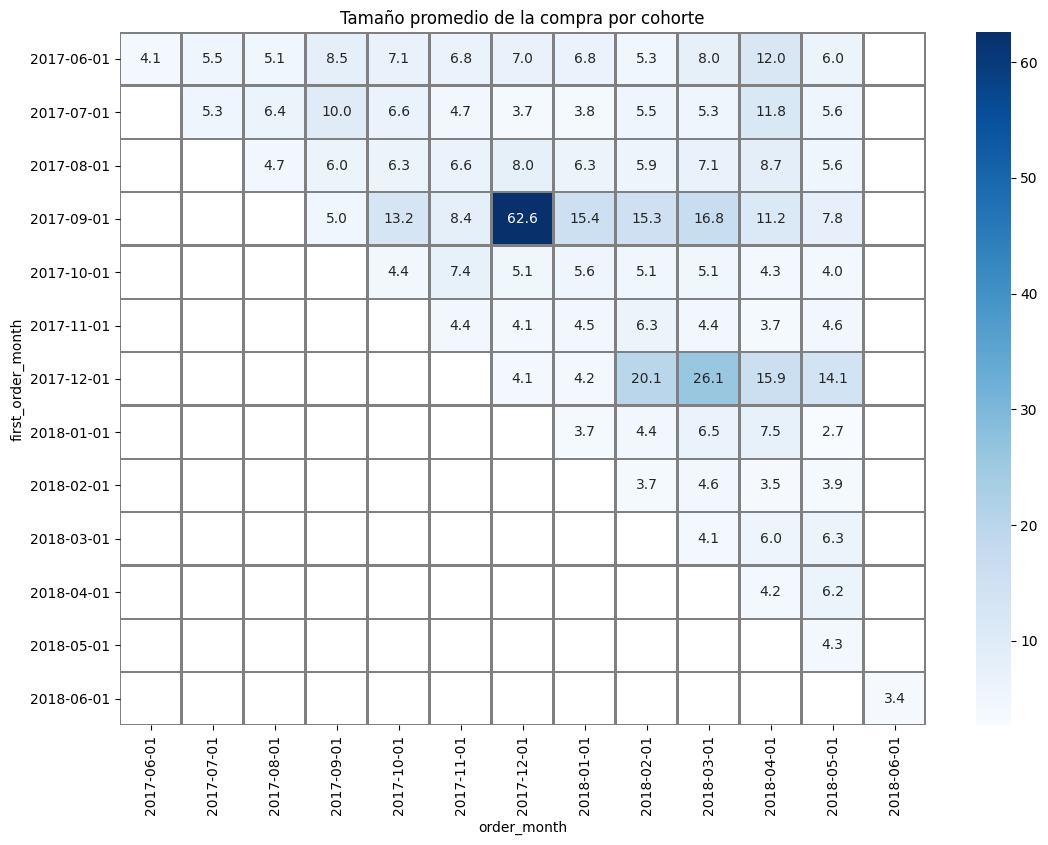

In [53]:
pivot_orders_size = df_orders.pivot_table(index="first_order_month", columns="order_month", values="revenue", aggfunc="mean")
plt.figure(figsize=(13, 9))
plt.title("Tamaño promedio de la compra por cohorte")
sns.heatmap(
    pivot_orders_size,
    annot=True,
    cmap="Blues",
    fmt=".1f",
    linewidths=1,
    linecolor="gray",)

In [54]:
avg_order_amount = df_orders["revenue"].mean()
print(f"El promedio total de las compras en general es de {avg_order_amount}")

El promedio total de las compras en general es de 4.999646930477041


El promedio de la compra es irregular durante el periodo de vida de los usuarios. Aquí también se corrobora que el cohorte más con mayor número de compras es el de septiembre del 2017, con el mayor número de compras promedio en diciembre 2012 con 62.6 dólares. 

- **¿Cuánto dinero traen? (LTV)**

In [55]:
#Primero obtenemos el número de compradores totales que hubo por cohorte
first_orders = df_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

cohort_sizes = (
    first_orders.groupby("first_order_month")
    .agg({"uid": "nunique"})
    .reset_index())

cohort_sizes.columns = ["first_order_month", "n_buyers"]
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [120]:
margin_rate = 1

In [121]:
df_buyers_final = pd.merge(df_orders,buyers, how= "inner",on="uid")
df_buyers_final = df_buyers_final.groupby(["first_order_month","order_month"]).agg({"revenue":"sum"}).reset_index()
df_buyers_final

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
...,...,...,...
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [122]:
cohorts = (
    df_orders.groupby(["first_order_month", "order_month"])
    .agg({"revenue": "sum"})
    .reset_index())


report = pd.merge(cohort_sizes, cohorts, on="first_order_month")
report["order_month"] = pd.to_datetime(report["order_month"],errors='coerce')  
report["first_order_month"] = pd.to_datetime(report["first_order_month"],errors='coerce')
report

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [123]:
report["gp"] = report["revenue"] * margin_rate
report["age"] = (report["order_month"].dt.month - report["first_order_month"].dt.month)
report['age'] += 12*(report['order_month'].dt.year - report['first_order_month'].dt.year)

<AxesSubplot:title={'center':'LTV por cohorte'}, xlabel='age', ylabel='first_order_month'>

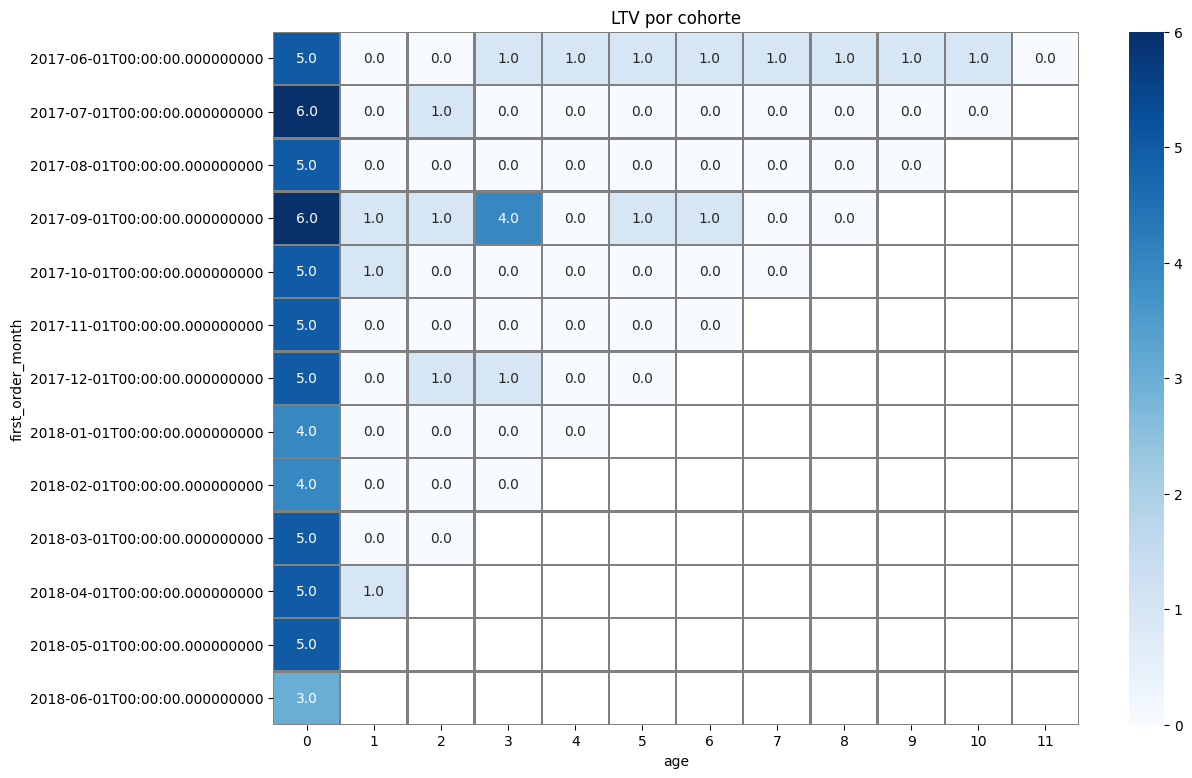

In [124]:
report["LTV"] = report["gp"] / report["n_buyers"]

result = report.pivot_table(index="first_order_month", columns="age", values="LTV", aggfunc="mean").round()
result.fillna('')
plt.figure(figsize=(13, 9))
plt.title("LTV por cohorte")
sns.heatmap(
    result,
    cmap="Blues",
    annot=True,
    fmt=".1f",
    linewidths=1,
    linecolor="gray",)

Al inicio del ciclo de vida de los usuarios de cada cohorte, el LTV generado es positivo para la empresa Showz. Los cohortes que generan mayor valor en su primer ciclo fueron los de julio y septiembre del 2017 con 6.0. Sin embargo, en sus consecutivos ciclos no genran cerca las ganancias iniciales. Solo hay un dato atípico del mismo cohorte de septiembre de 2017 con 4.0. Por lo tanto, la empresa, debe de evaluar por qué pierde tantas ganancias mietras corre el ciclo de vida de cada cohorte. 


# Marketing:

- ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
- ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones? (ROMI)

Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.

- **¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)**

<AxesSubplot:title={'center':'Costos por cohorte y su fuente de anuncio'}, xlabel='source_id', ylabel='month_cost'>

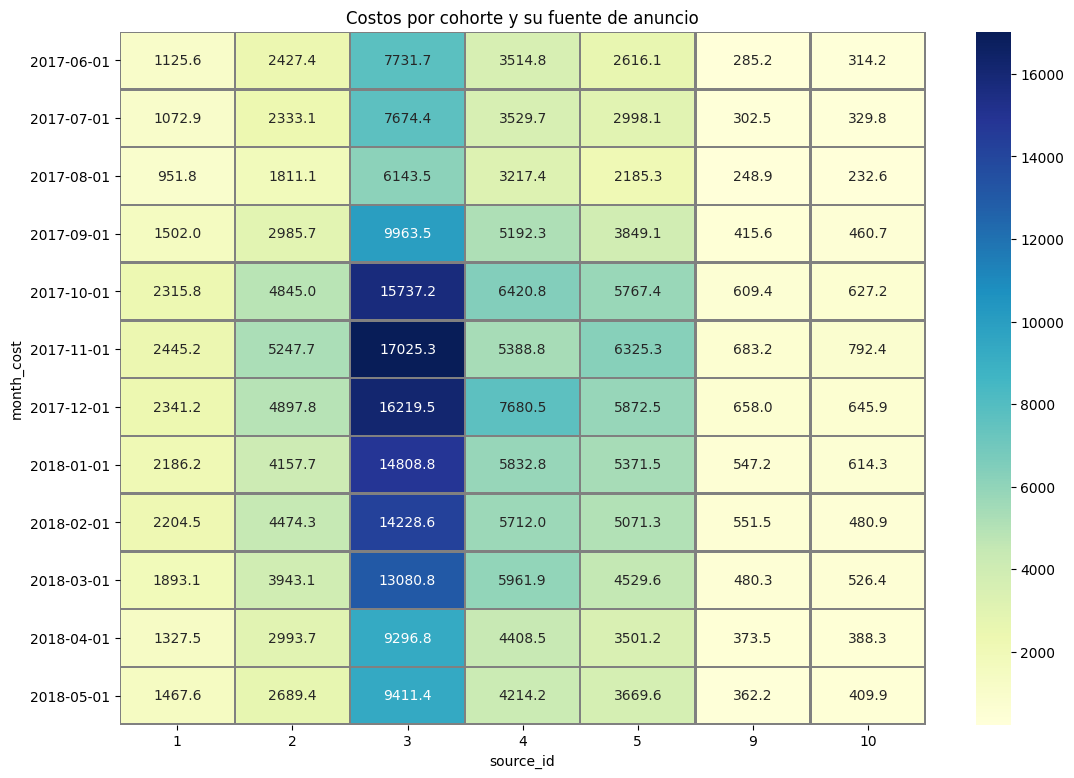

In [97]:
df_costs["month_cost"] = df_costs["dt"].astype("datetime64[M]")
df_costs["month_cost"] = df_costs["month_cost"].dt.strftime("%Y-%m-%d")
total_costs = df_costs.pivot_table(index="month_cost", columns="source_id", values="costs", aggfunc="sum")
plt.figure(figsize=(13, 9))
plt.title("Costos por cohorte y su fuente de anuncio")
sns.heatmap(
    total_costs,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=1,
    linecolor="gray",)

La fuente de anuncio que tuvo más costos en fue el 3 para cada uno de los cohortes fue el más significativo. Mientras que las fuentes de anuncio 9 y 10 representan los costos de menor cantidad en todos los cohortes. 

- **¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [98]:
#Agrupamos el total de costos por cohorte con base en el mes
monthly_cost_cohorts = df_costs.groupby(["source_id","month_cost"])["costs"].sum().reset_index()
monthly_cost_cohorts

,source_id,month_cost,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75
...,...,...,...
79,10,2018-01-01,614.35
80,10,2018-02-01,480.88
81,10,2018-03-01,526.41
82,10,2018-04-01,388.25


In [99]:
#Obtenemos el total de compradores por cohorte mensual
monthly_total_buyers = report.groupby("order_month")["n_buyers"].sum().reset_index()
monthly_total_buyers 

,order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,3946
2,2017-08-01,5316
3,2017-09-01,7897
4,2017-10-01,12237
5,2017-11-01,16318
6,2017-12-01,20701
7,2018-01-01,24074
8,2018-02-01,27725
9,2018-03-01,31258


In [100]:
#Unimos las tablas de costo por cohorte y la de compradores totales
monthly_cost_cohorts['month_cost'] = pd.to_datetime(monthly_cost_cohorts['month_cost'], errors='coerce')
monthly_total_buyers['order_month'] = pd.to_datetime(monthly_total_buyers['order_month'], errors='coerce')

# Si solo te interesa la parte de la fecha (sin hora), puedes truncar la hora
monthly_cost_cohorts['month_cost'] = monthly_cost_cohorts['month_cost'].dt.date
monthly_total_buyers['order_month'] = monthly_total_buyers['order_month'].dt.date
cac_table = pd.merge(monthly_cost_cohorts, monthly_total_buyers, left_on='month_cost', right_on='order_month', how='inner')

#Calculamos el cac
cac_table["cac"] = cac_table["costs"]/cac_table["n_buyers"]

#Realizamos la tabla pivote del cac de acuerdo con la fuente y sus respectivos cohortes
cac_table_pivot = cac_table.pivot_table(index="month_cost",columns="source_id", values="cac", aggfunc="sum")
cac_table_pivot

source_id,1,2,3,4,5,9,10
month_cost,,,,,,,
2017-06-01,0.556406,1.199891,3.821873,1.737420,1.293188,0.140989,0.155324
2017-07-01,0.271891,0.591260,1.944848,0.894508,0.759792,0.076670,0.083583
2017-08-01,0.179046,0.340679,1.155670,0.605222,0.411076,0.046827,0.043749
2017-09-01,0.190200,0.378075,1.261688,0.657498,0.487418,0.052630,0.058335
2017-10-01,0.189242,0.395930,1.286037,0.524707,0.471308,0.049801,0.051258
2017-11-01,0.149844,0.321588,1.043347,0.330238,0.387630,0.041867,0.048557
2017-12-01,0.113096,0.236597,0.783514,0.371019,0.283683,0.031785,0.031199
2018-01-01,0.090811,0.172707,0.615136,0.242286,0.223125,0.022728,0.025519
2018-02-01,0.079512,0.161383,0.513203,0.206022,0.182915,0.019892,0.017345


- **¿Cuán rentables eran las inversiones? (ROMI)**

In [101]:
ltv_per_month = report.groupby(["first_order_month","age"])["LTV"].sum().reset_index()
ltv_per_month

,first_order_month,age,LTV
0,2017-06-01,0,4.724414
1,2017-06-01,1,0.485329
2,2017-06-01,2,0.437637
3,2017-06-01,3,0.954671
4,2017-06-01,4,1.022531
...,...,...,...
74,2018-03-01,2,0.315559
75,2018-04-01,0,4.657597
76,2018-04-01,1,0.531599
77,2018-05-01,0,4.660562


In [102]:
cac_per_month = cac_table.groupby("order_month")["cac"].sum().reset_index()
cac_table["first_order_month"] = cac_table["order_month"].astype("datetime64[M]")
cac_table

,source_id,month_cost,costs,order_month,n_buyers,cac,first_order_month
0,1,2017-06-01,1125.61,2017-06-01,2023,0.556406,2017-06-01
1,2,2017-06-01,2427.38,2017-06-01,2023,1.199891,2017-06-01
2,3,2017-06-01,7731.65,2017-06-01,2023,3.821873,2017-06-01
3,4,2017-06-01,3514.80,2017-06-01,2023,1.737420,2017-06-01
4,5,2017-06-01,2616.12,2017-06-01,2023,1.293188,2017-06-01
...,...,...,...,...,...,...,...
79,3,2018-05-01,9411.42,2018-05-01,36522,0.257692,2018-05-01
80,4,2018-05-01,4214.21,2018-05-01,36522,0.115388,2018-05-01
81,5,2018-05-01,3669.56,2018-05-01,36522,0.100475,2018-05-01
82,9,2018-05-01,362.17,2018-05-01,36522,0.009916,2018-05-01


In [103]:
cac_and_ltv = pd.merge(ltv_per_month,cac_table, on="first_order_month")
cac_and_ltv

,first_order_month,age,LTV,source_id,month_cost,costs,order_month,n_buyers,cac
0,2017-06-01,0,4.724414,1,2017-06-01,1125.61,2017-06-01,2023,0.556406
1,2017-06-01,0,4.724414,2,2017-06-01,2427.38,2017-06-01,2023,1.199891
2,2017-06-01,0,4.724414,3,2017-06-01,7731.65,2017-06-01,2023,3.821873
3,2017-06-01,0,4.724414,4,2017-06-01,3514.80,2017-06-01,2023,1.737420
4,2017-06-01,0,4.724414,5,2017-06-01,2616.12,2017-06-01,2023,1.293188
...,...,...,...,...,...,...,...,...,...
541,2018-05-01,0,4.660562,3,2018-05-01,9411.42,2018-05-01,36522,0.257692
542,2018-05-01,0,4.660562,4,2018-05-01,4214.21,2018-05-01,36522,0.115388
543,2018-05-01,0,4.660562,5,2018-05-01,3669.56,2018-05-01,36522,0.100475
544,2018-05-01,0,4.660562,9,2018-05-01,362.17,2018-05-01,36522,0.009916


In [104]:
cac_and_ltv["romi"] = cac_and_ltv["LTV"] / cac_and_ltv["cac"]
cac_and_ltv

,first_order_month,age,LTV,source_id,month_cost,costs,order_month,n_buyers,cac,romi
0,2017-06-01,0,4.724414,1,2017-06-01,1125.61,2017-06-01,2023,0.556406,8.490943
1,2017-06-01,0,4.724414,2,2017-06-01,2427.38,2017-06-01,2023,1.199891,3.937369
2,2017-06-01,0,4.724414,3,2017-06-01,7731.65,2017-06-01,2023,3.821873,1.236151
3,2017-06-01,0,4.724414,4,2017-06-01,3514.80,2017-06-01,2023,1.737420,2.719213
4,2017-06-01,0,4.724414,5,2017-06-01,2616.12,2017-06-01,2023,1.293188,3.653307
...,...,...,...,...,...,...,...,...,...,...
541,2018-05-01,0,4.660562,3,2018-05-01,9411.42,2018-05-01,36522,0.257692,18.085799
542,2018-05-01,0,4.660562,4,2018-05-01,4214.21,2018-05-01,36522,0.115388,40.390264
543,2018-05-01,0,4.660562,5,2018-05-01,3669.56,2018-05-01,36522,0.100475,46.385140
544,2018-05-01,0,4.660562,9,2018-05-01,362.17,2018-05-01,36522,0.009916,469.981099


<AxesSubplot:title={'center':'ROMI por cohorte'}, xlabel='age', ylabel='order_month'>

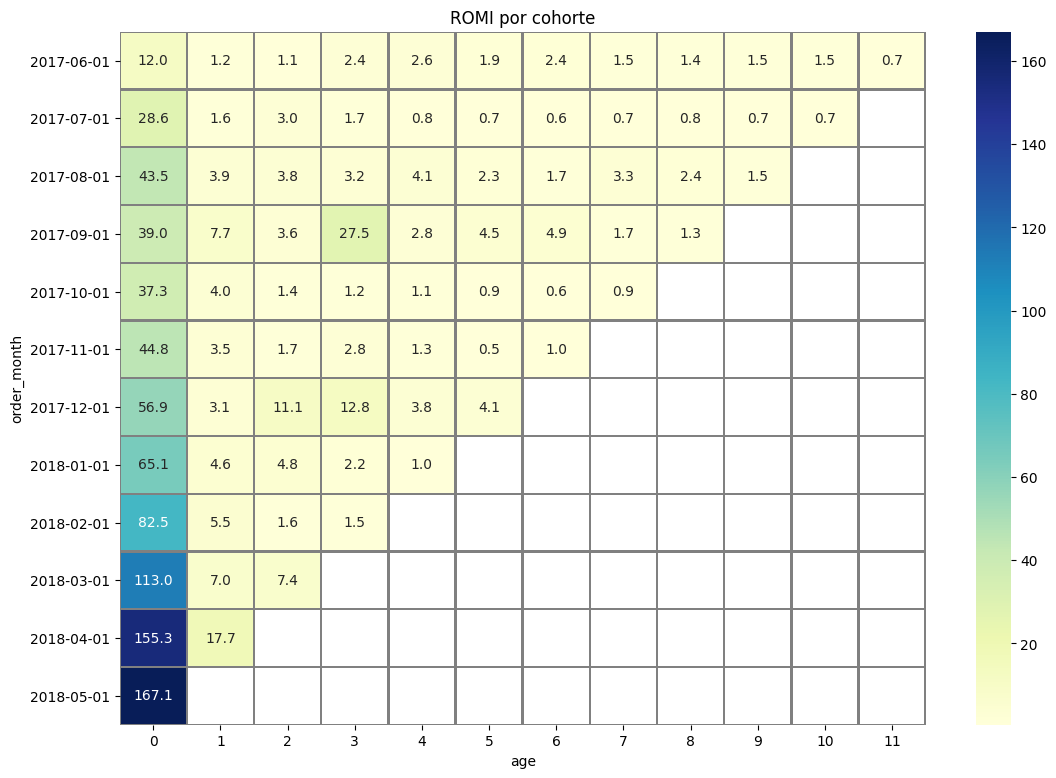

In [105]:
romi = cac_and_ltv.pivot_table( index="order_month", columns="age", values="romi", aggfunc="mean")
romi.fillna("")
plt.figure(figsize=(13, 9))
plt.title("ROMI por cohorte")
sns.heatmap(
    romi,
    cmap="YlGnBu",
    annot=True,
    fmt=".1f",
    linewidths=1,
    linecolor="gray",)

El ROMI generado por los cohortes al inicio es positivo para la empresa. Sin embargo, al pasar sus ciclos de vida el regreso en la inversión va disminnuyendo considerablemente. La única excepción sigue siendo el cohorte de septiembre de 2017, en cuyo tercer ciclo genera un 27.5 de ROMI comparado con el 3.2, 1.7 o 2.4 de los cohortes que le anteceden. 

- **Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo.**

<AxesSubplot:title={'center':'ROMI por fuente de anuncio'}, xlabel='age'>

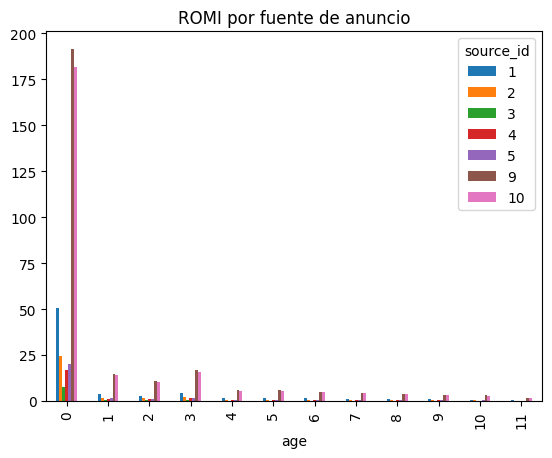

In [106]:
romi_source = cac_and_ltv.pivot_table( index="age", columns="source_id", values="romi", aggfunc="mean")
romi_source.plot(kind="bar", title="ROMI por fuente de anuncio")

El ROMI en todas las fuentes de anuncios es positiva, en especial para la 9 y 10. Sin embargo, al pasar los ciclos de vida el ROMI generado disminuye drásticamente para todas las fuentes de anuncios. Por lo que la empresa debe de evaluar nuevas estraegias, ya sea enfocar sus esfuerzos en las fuentes 9 y 10 o disminuir la cantidad de anuncios en los que gasta. 

In [107]:
#Análisis de CAC, LTV y ROMI con base en el dispositivo
#Se une la tabla de df_visits con solo el uid y device con la tabla de orders para obtener cuántos usuarios hay por device
df_visits_reduced = df_visits[["uid", "device"]]
df_per_device = df_orders.merge(df_visits_reduced, on="uid")
df_per_device

,buy_ts,revenue,uid,first_order_date,first_order_day,order_day,first_order_month,order_month,device
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,desktop
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,desktop
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,desktop
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,desktop
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01,2017-06-01,desktop
...,...,...,...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,2018-05-01,2018-05-01,desktop
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,2018-05-01,2018-05-01,desktop
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,2018-05-01,2018-05-01,desktop
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-31 23:56:00,2018-05-31,2018-05-31,2018-05-01,2018-05-01,desktop


In [131]:
#Se obtiene la cantidad de usuarios de cada dispositivo de acuerdo con el mes de compra. 
users_per_device = df_per_device.groupby(["order_month","device"])["uid"].count().reset_index()
users_per_device["order_month"] = pd.to_datetime(users_per_device["order_month"], errors="coerce")

users_per_device["order_month"] = users_per_device["order_month"].dt.date
users_per_device

,order_month,device,uid
0,2017-06-01,desktop,24330
1,2017-06-01,touch,1509
2,2017-07-01,desktop,32432
3,2017-07-01,touch,1937
4,2017-08-01,desktop,34575
5,2017-08-01,touch,1271
6,2017-09-01,desktop,62715
7,2017-09-01,touch,2441
8,2017-10-01,desktop,67711
9,2017-10-01,touch,5912


In [132]:
#Se une la tabla anterior con los cálculos realizados para el cac y ltv originales ya que ahí están los resultados por revenue
#y por costos de cada mes de ccompra. 
df_device_merge = cac_and_ltv.merge(users_per_device, on="order_month")
df_device_merge["order_month"] = pd.to_datetime(df_device_merge["order_month"], errors="coerce")
df_device_merge["order_month"] = df_device_merge["order_month"].dt.date
df_device_merge

,first_order_month,age,LTV,source_id,month_cost,costs,order_month,n_buyers,cac,romi,device,uid
0,2017-06-01,0,4.724414,1,2017-06-01,1125.61,2017-06-01,2023,0.556406,8.490943,desktop,24330
1,2017-06-01,0,4.724414,1,2017-06-01,1125.61,2017-06-01,2023,0.556406,8.490943,touch,1509
2,2017-06-01,0,4.724414,2,2017-06-01,2427.38,2017-06-01,2023,1.199891,3.937369,desktop,24330
3,2017-06-01,0,4.724414,2,2017-06-01,2427.38,2017-06-01,2023,1.199891,3.937369,touch,1509
4,2017-06-01,0,4.724414,3,2017-06-01,7731.65,2017-06-01,2023,3.821873,1.236151,desktop,24330
...,...,...,...,...,...,...,...,...,...,...,...,...
1087,2018-05-01,0,4.660562,5,2018-05-01,3669.56,2018-05-01,36522,0.100475,46.385140,touch,4280
1088,2018-05-01,0,4.660562,9,2018-05-01,362.17,2018-05-01,36522,0.009916,469.981099,desktop,58964
1089,2018-05-01,0,4.660562,9,2018-05-01,362.17,2018-05-01,36522,0.009916,469.981099,touch,4280
1090,2018-05-01,0,4.660562,10,2018-05-01,409.86,2018-05-01,36522,0.011222,415.295600,desktop,58964


In [133]:
#Se calcula el cac, ltv y romi divido entre el número de usuarios que hay en cada device
df_device_merge["order_month"] = pd.to_datetime(df_device_merge["order_month"], errors="coerce")
df_device_complete = df_device_merge.merge(report, on="order_month")
df_device_complete["cac_device"] = df_device_complete["costs"]/df_device_complete["uid"]
df_device_complete["ltv_device"] = df_device_complete["revenue"]/df_device_complete["uid"]
df_device_complete["romi"] = df_device_complete["cac_device"]/df_device_complete["ltv_device"]
df_device_complete

,first_order_month_x,age_x,LTV_x,source_id,month_cost,costs,order_month,n_buyers_x,cac,romi,device,uid,first_order_month_y,n_buyers_y,revenue,gp,age_y,LTV_y,cac_device,ltv_device
0,2017-06-01,0,4.724414,1,2017-06-01,1125.61,2017-06-01,2023,0.556406,0.117773,desktop,24330,2017-06-01,2023,9557.49,9557.49,0,4.724414,0.046264,0.392827
1,2017-06-01,0,4.724414,1,2017-06-01,1125.61,2017-06-01,2023,0.556406,0.117773,touch,1509,2017-06-01,2023,9557.49,9557.49,0,4.724414,0.745931,6.333658
2,2017-06-01,0,4.724414,2,2017-06-01,2427.38,2017-06-01,2023,1.199891,0.253977,desktop,24330,2017-06-01,2023,9557.49,9557.49,0,4.724414,0.099769,0.392827
3,2017-06-01,0,4.724414,2,2017-06-01,2427.38,2017-06-01,2023,1.199891,0.253977,touch,1509,2017-06-01,2023,9557.49,9557.49,0,4.724414,1.608602,6.333658
4,2017-06-01,0,4.724414,3,2017-06-01,7731.65,2017-06-01,2023,3.821873,0.808962,desktop,24330,2017-06-01,2023,9557.49,9557.49,0,4.724414,0.317783,0.392827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,2018-05-01,0,4.660562,10,2018-05-01,409.86,2018-05-01,36522,0.011222,1.938056,touch,4280,2018-01-01,3373,211.48,211.48,4,0.062698,0.095762,0.049411
5092,2018-05-01,0,4.660562,10,2018-05-01,409.86,2018-05-01,36522,0.011222,1.514075,touch,4280,2018-02-01,3651,270.70,270.70,3,0.074144,0.095762,0.063248
5093,2018-05-01,0,4.660562,10,2018-05-01,409.86,2018-05-01,36522,0.011222,0.367630,touch,4280,2018-03-01,3533,1114.87,1114.87,2,0.315559,0.095762,0.260484
5094,2018-05-01,0,4.660562,10,2018-05-01,409.86,2018-05-01,36522,0.011222,0.338750,touch,4280,2018-04-01,2276,1209.92,1209.92,1,0.531599,0.095762,0.282692


<AxesSubplot:title={'center':'CAC por device'}, xlabel='age', ylabel='CAC generado'>

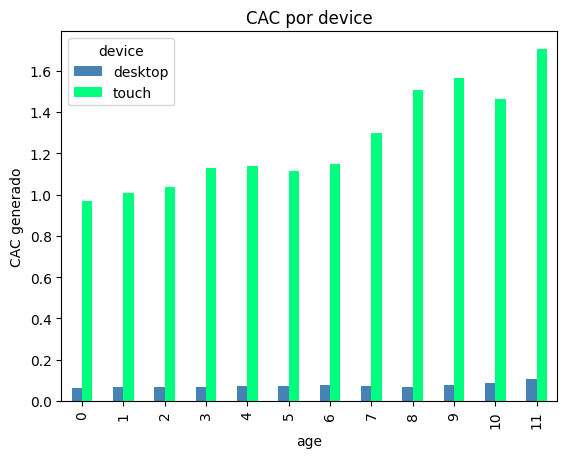

In [134]:
cac_device = df_device_complete.pivot_table(index="age_x", columns="device", values="cac_device", aggfunc="mean")
cac_device.plot(kind="bar", title="CAC por device", xlabel="age", ylabel="CAC generado", color=["steelblue","springgreen"])

<AxesSubplot:title={'center':'LTV por device'}, xlabel='age', ylabel='LTV generado'>

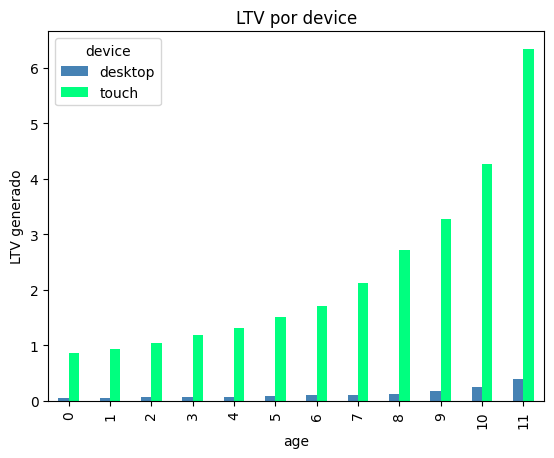

In [135]:
ltv_device = df_device_complete.pivot_table(index="age_x", columns="device", values="ltv_device", aggfunc="mean")
ltv_device.plot(kind="bar", title="LTV por device", xlabel="age", ylabel="LTV generado", color=["steelblue","springgreen"])

<AxesSubplot:title={'center':'ROMI por device'}, xlabel='age', ylabel='ROMI generado'>

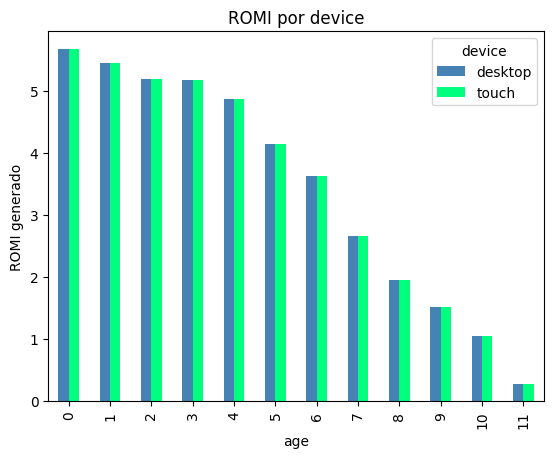

In [136]:
romi_device = df_device_complete.pivot_table(index="age_x", columns="device", values="romi", aggfunc="mean")
romi_device.plot(kind="bar", title="ROMI por device", xlabel="age", ylabel="ROMI generado", color=["steelblue","springgreen"])

En estas gráficas corroboramos que el touch contiene un mayor costo para atraer a los usuarios. Mientras que las desktop se muestran más efectivos para el momento de la compra de los usuarios. 

# Paso 3. Conclusión: cuánto dinero invertir y dónde


- ¿Qué fuentes/plataformas recomendarías? 
 - Se recomienda seguir una inversión en las fuentes 9 y 10 debido a que son las que reprensentaron menos costos en todos los cohortes y el ROMI que generó fue el mayor. Por lo que para la **atracción de clientes** esta sería la mejor acción que puede tomar la companía.
 - En cuanto a las compras de los clientes, estas reducen drásticamente durante sus ciclos de vida. Sin embargo, al revisar al cohorte de septiembre de 2017, notamos que este cohorte es el que presenta datos atípicos en donde sus compras o visitas aumentan durante algunos ciclos. Por lo que se puede **recolectar información o encuestas de los usuarios que pertenecen a este cohorte** para analizar si hay alguna particularidad que ayude a la empresa que otros cohortes se comporten como el de septiembre de 2017. 
 - En relación a las plataformas, la mayoría de las compras se relizaron en touch en lugar del touch con una gran diferencia. Valdría la pena que **evaluara si la interfaz del desktop es fácil de manejar para los usuarios.** Esto debido a que puede ser una oportunidad aún desaprovechada y que provoque la baja en las compras. 

- Fundamenta tu selección: ¿en qué métricas te enfocaste? ¿Por qué?

Se basa la investigación en todas las métricas, ya que al dividir por fuente de anuncio y dispositivo nos da una buena indicación de qué tan efectivo de acuerdo con sus ingresos y costos generados paa la empresa. Igualmente es importante segmentar el análisis para explicar cómo se compartan distintas variables. 

- ¿Qué conclusiones sacaste después de encontrar los valores métricos?
 -  **Fuentes de anuncios:** Invertir en las fuentes 9 y 10 debido a su alta eficiencia en cuanto a costo y retorno.
Cohorte de septiembre de 2017: Analizar este cohorte atípico para descubrir comportamientos que podrían aplicarse a otros cohortes.
 -  **Plataformas (Desktop vs. Touch):** Evaluar y mejorar la interfaz en desktop para aprovechar la oportunidad de aumentar las compras a través de este dispositivo.

Estas acciones están basadas en las métricas de rendimiento, como costos, ingresos generados, y tasas de conversión de diferentes cohortes y plataformas, lo cual permite tomar decisiones informadas y optimizar el gasto en marketing.